# Analysis and insights Python script: Solar power plant generation analysis
## Part 1: Data quality check and data mart creation

## Import the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

We have 4 data files:

- Plant 1, generation data
- Plant 1, sensors' data
- Plant 2, generation data
- Plant 2, sensors' data

### Load data from plant 1 - generation data

In [3]:
p1g = pd.read_csv("data/Plant_1_Generation_Data.csv")
p1g

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,17-06-2020 23:45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,17-06-2020 23:45,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,17-06-2020 23:45,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,17-06-2020 23:45,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


### Load data from plant 1 - sensors' data

In [4]:
p1w = pd.read_csv("data/Plant_1_Weather_Sensor_Data.csv")
p1w

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


### Load data from plant 2 - generation data

In [5]:
p2g = pd.read_csv("data/Plant_2_Generation_Data.csv")
p2g

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07
...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.000000,5.207580e+05
67694,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.000000,1.211314e+08
67695,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.000000,2.427691e+06
67696,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08


### Load data from plant 2 - sensors' data

In [6]:
p2w = pd.read_csv("data/Plant_2_Weather_Sensor_Data.csv")
p2w

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0
...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,4136001,iq8k7ZNt4Mwm3w0,23.511703,22.856201,0.0
3255,2020-06-17 23:00:00,4136001,iq8k7ZNt4Mwm3w0,23.482282,22.744190,0.0
3256,2020-06-17 23:15:00,4136001,iq8k7ZNt4Mwm3w0,23.354743,22.492245,0.0
3257,2020-06-17 23:30:00,4136001,iq8k7ZNt4Mwm3w0,23.291048,22.373909,0.0


## Data quality

### Data quality plant 1 - generation data

Let's start with a general overview of the data.

In [7]:
p1g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


There are no nulls.

We should change DATE_TIME to a datetime data type.

In [8]:
p1g["DATE_TIME"] = pd.to_datetime(p1g["DATE_TIME"], dayfirst=True)

We can check the conversion is correctly applied.

In [9]:
p1g.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


Let's check that the PLANT_ID is unique.

In [10]:
p1g["PLANT_ID"].unique()

array([4135001], dtype=int64)

We can switch to an easier-to-read identifier instead:

In [12]:
p1g["PLANT_ID"] = p1g["PLANT_ID"].replace(4135001, "p1")

Let's run now a quick statistical analysis on the numerical variables.

In [13]:
p1g.describe().T

,count,mean,std,min,25%,50%,75%,max
DC_POWER,68778.0,3.147426e+03,4036.457169,0.0,0.000000e+00,4.290000e+02,6.366964e+03,14471.125
AC_POWER,68778.0,3.078028e+02,394.396439,0.0,0.000000e+00,4.149375e+01,6.236187e+02,1410.950
DAILY_YIELD,68778.0,3.295969e+03,3145.178309,0.0,0.000000e+00,2.658714e+03,6.274000e+03,9163.000
TOTAL_YIELD,68778.0,6.978712e+06,416271.982856,6183645.0,6.512003e+06,7.146685e+06,7.268706e+06,7846821.000


The AC power values look to be around 10 times lower than the DC ones. This is a huge difference.

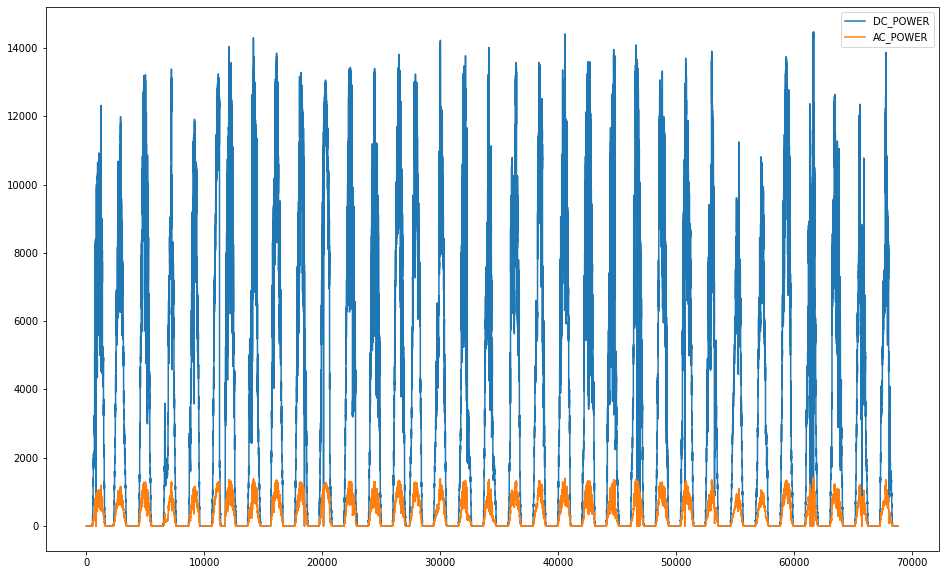

In [15]:
p1g[["DC_POWER","AC_POWER"]].plot(figsize=(16,10));

Having such a noticeable difference between DC and AC generation, let's see first if both variables are correlated and then we'll check the mean ratio between them.

In [17]:
p1g["DC_POWER"].corr(p1g["AC_POWER"])

0.9999962553331395

In [19]:
(p1g["DC_POWER"] / p1g["AC_POWER"]).describe().T

count    36827.000000
mean        10.233664
std          0.048174
min          9.381550
25%         10.202582
50%         10.220231
75%         10.248110
max         10.465522
dtype: float64

We can see that the inverters are working with a 10% efficiency when transforming DC into AC, which is a very low performance.

But we will analyse this in the Analysis and Insights section.

